# EXPLORATORY DATA ANALYSIS 
---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils as eda

URL = '../data/interim/total_data_clean.csv'
total_data = pd.read_csv(URL)
target = 'Outcome'

<small> Note: The 'utils.py' file contains **specific functions** according to the standards of Exploratory Data Analysis (EDA) and Descriptive Data Analysis (DDA). The functions with the prefix 'eda' are described in the 'utils.py' doc <small>

## Step 1: Multivariable analysis
---

_NOTE: Since there are no categorical variables besides the already factorized target "Outcome," there is no need for Categorical-Categorical analysis or variable factorization_.

### 1.1. Numerical - Numerical analysis between predictors and target:

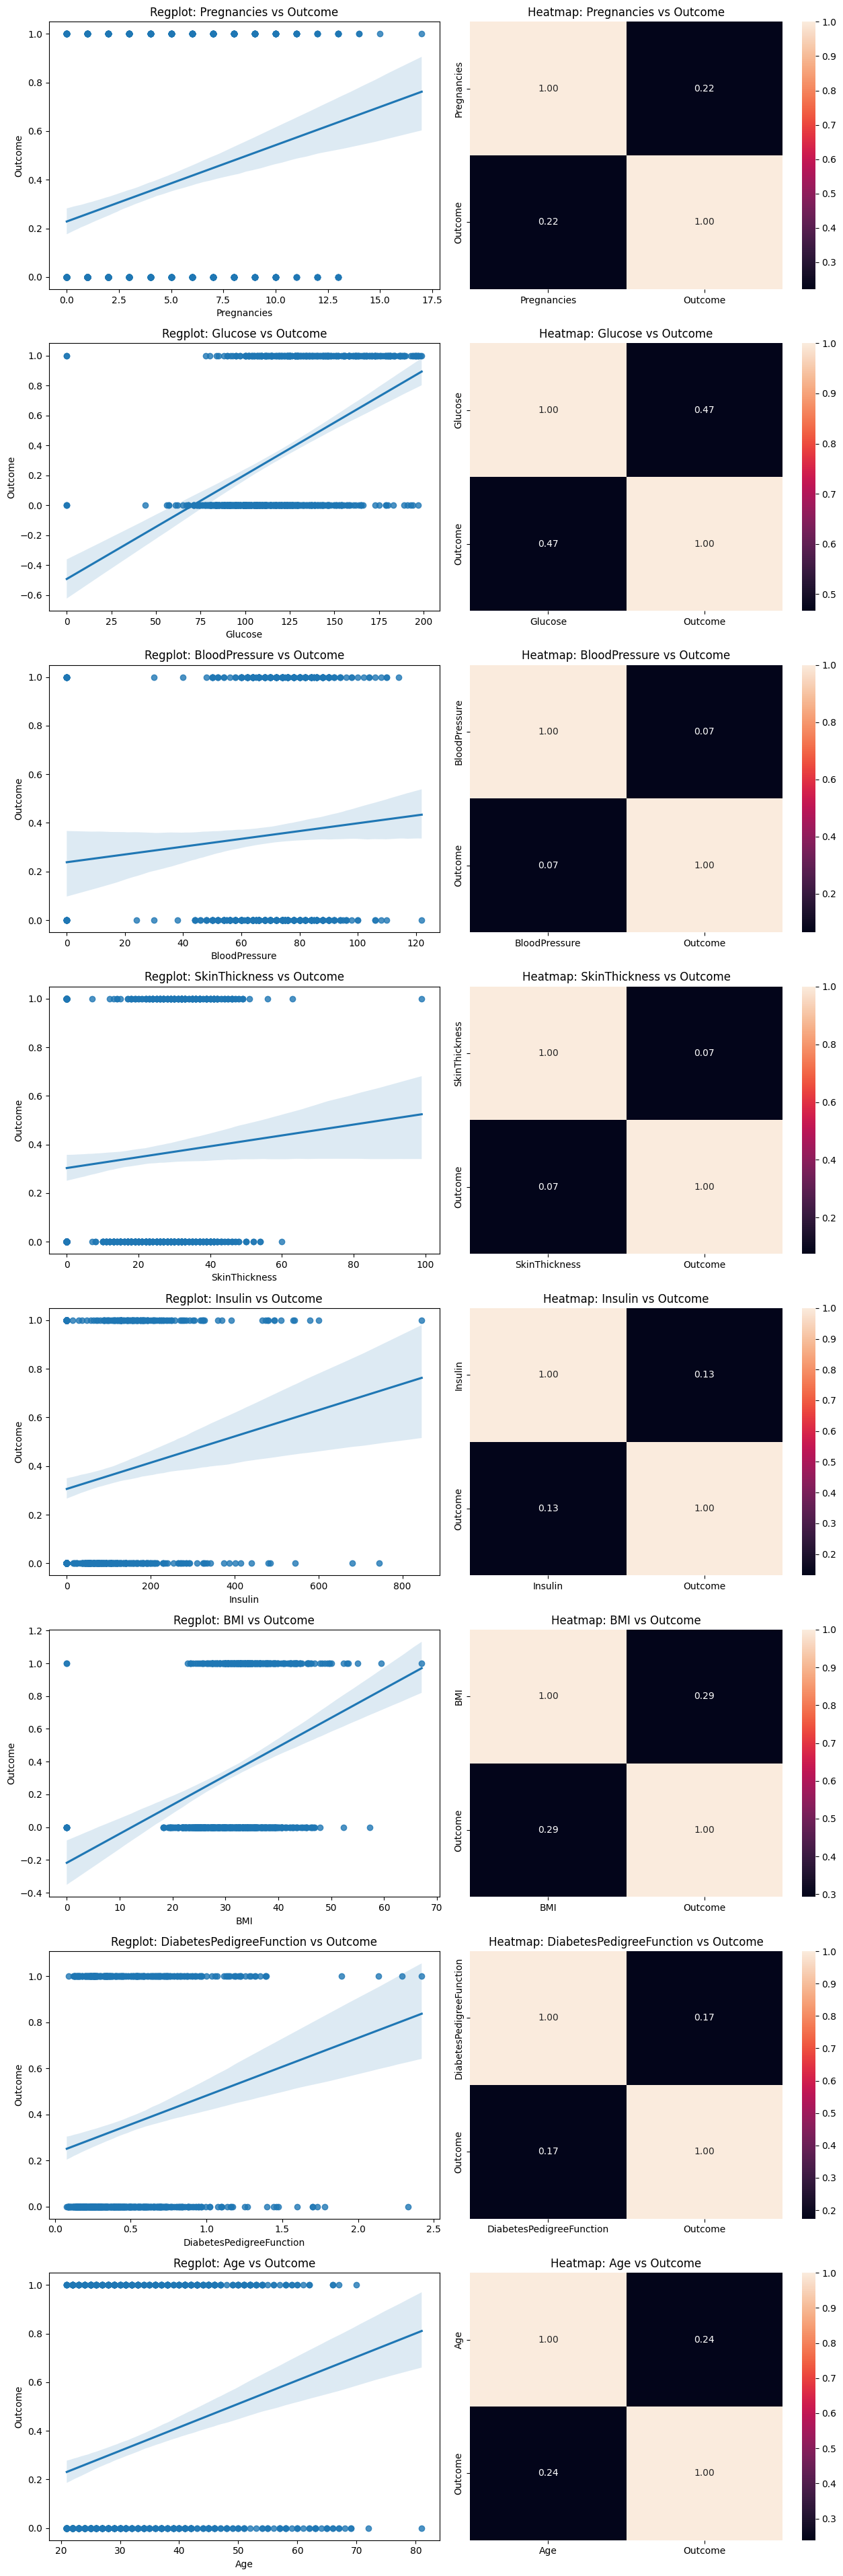

In [3]:
# CUSTOM FUNCTION FOR NUMERICAL-NUMERICAL ANALYSIS
eda.plot_scatter_heatmaps(total_data,target)

The numerical-numerical analysis yields the following conclusions:

**Strong correlations:**
- **Glucose:** 0.47
- **BMI (Body Mass Index):** 0.29
- **Age:** 0.24
- **Pregnancies:** 0.22

**Weak correlations:**
- **Diabetes Pedigree Function:** 0.17
- **Insulin:** 0.13
- **Blood Pressure:** 0.07
- **Skin Thickness:** 0.07



### 1.2. General correlation heatmap:

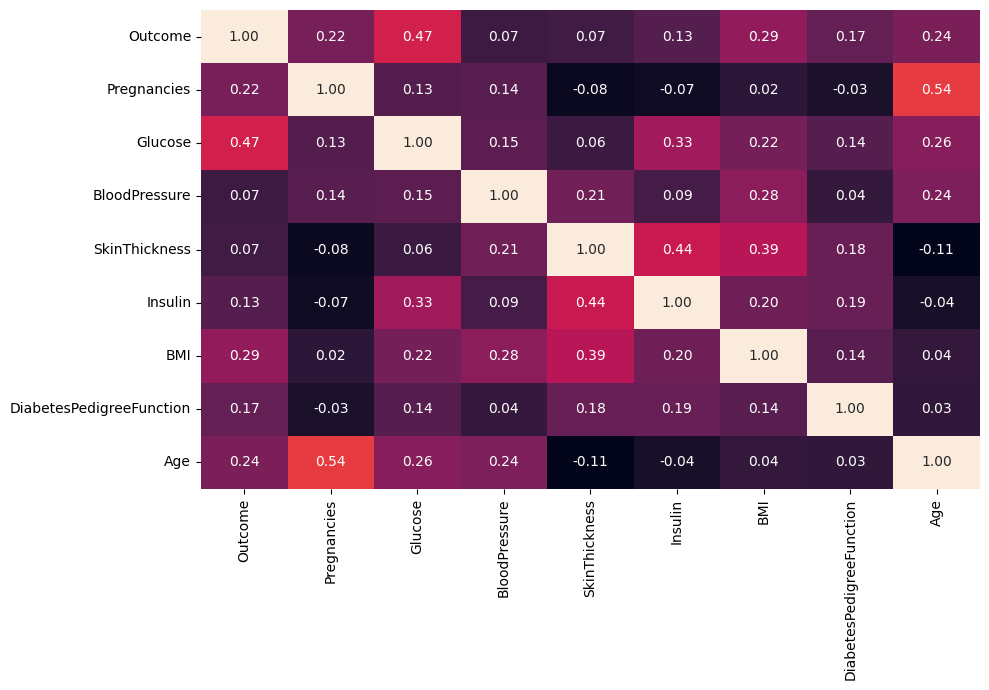

In [4]:
eda.general_heatmap(total_data,target)

### 1.3. General dataset scatter plot:

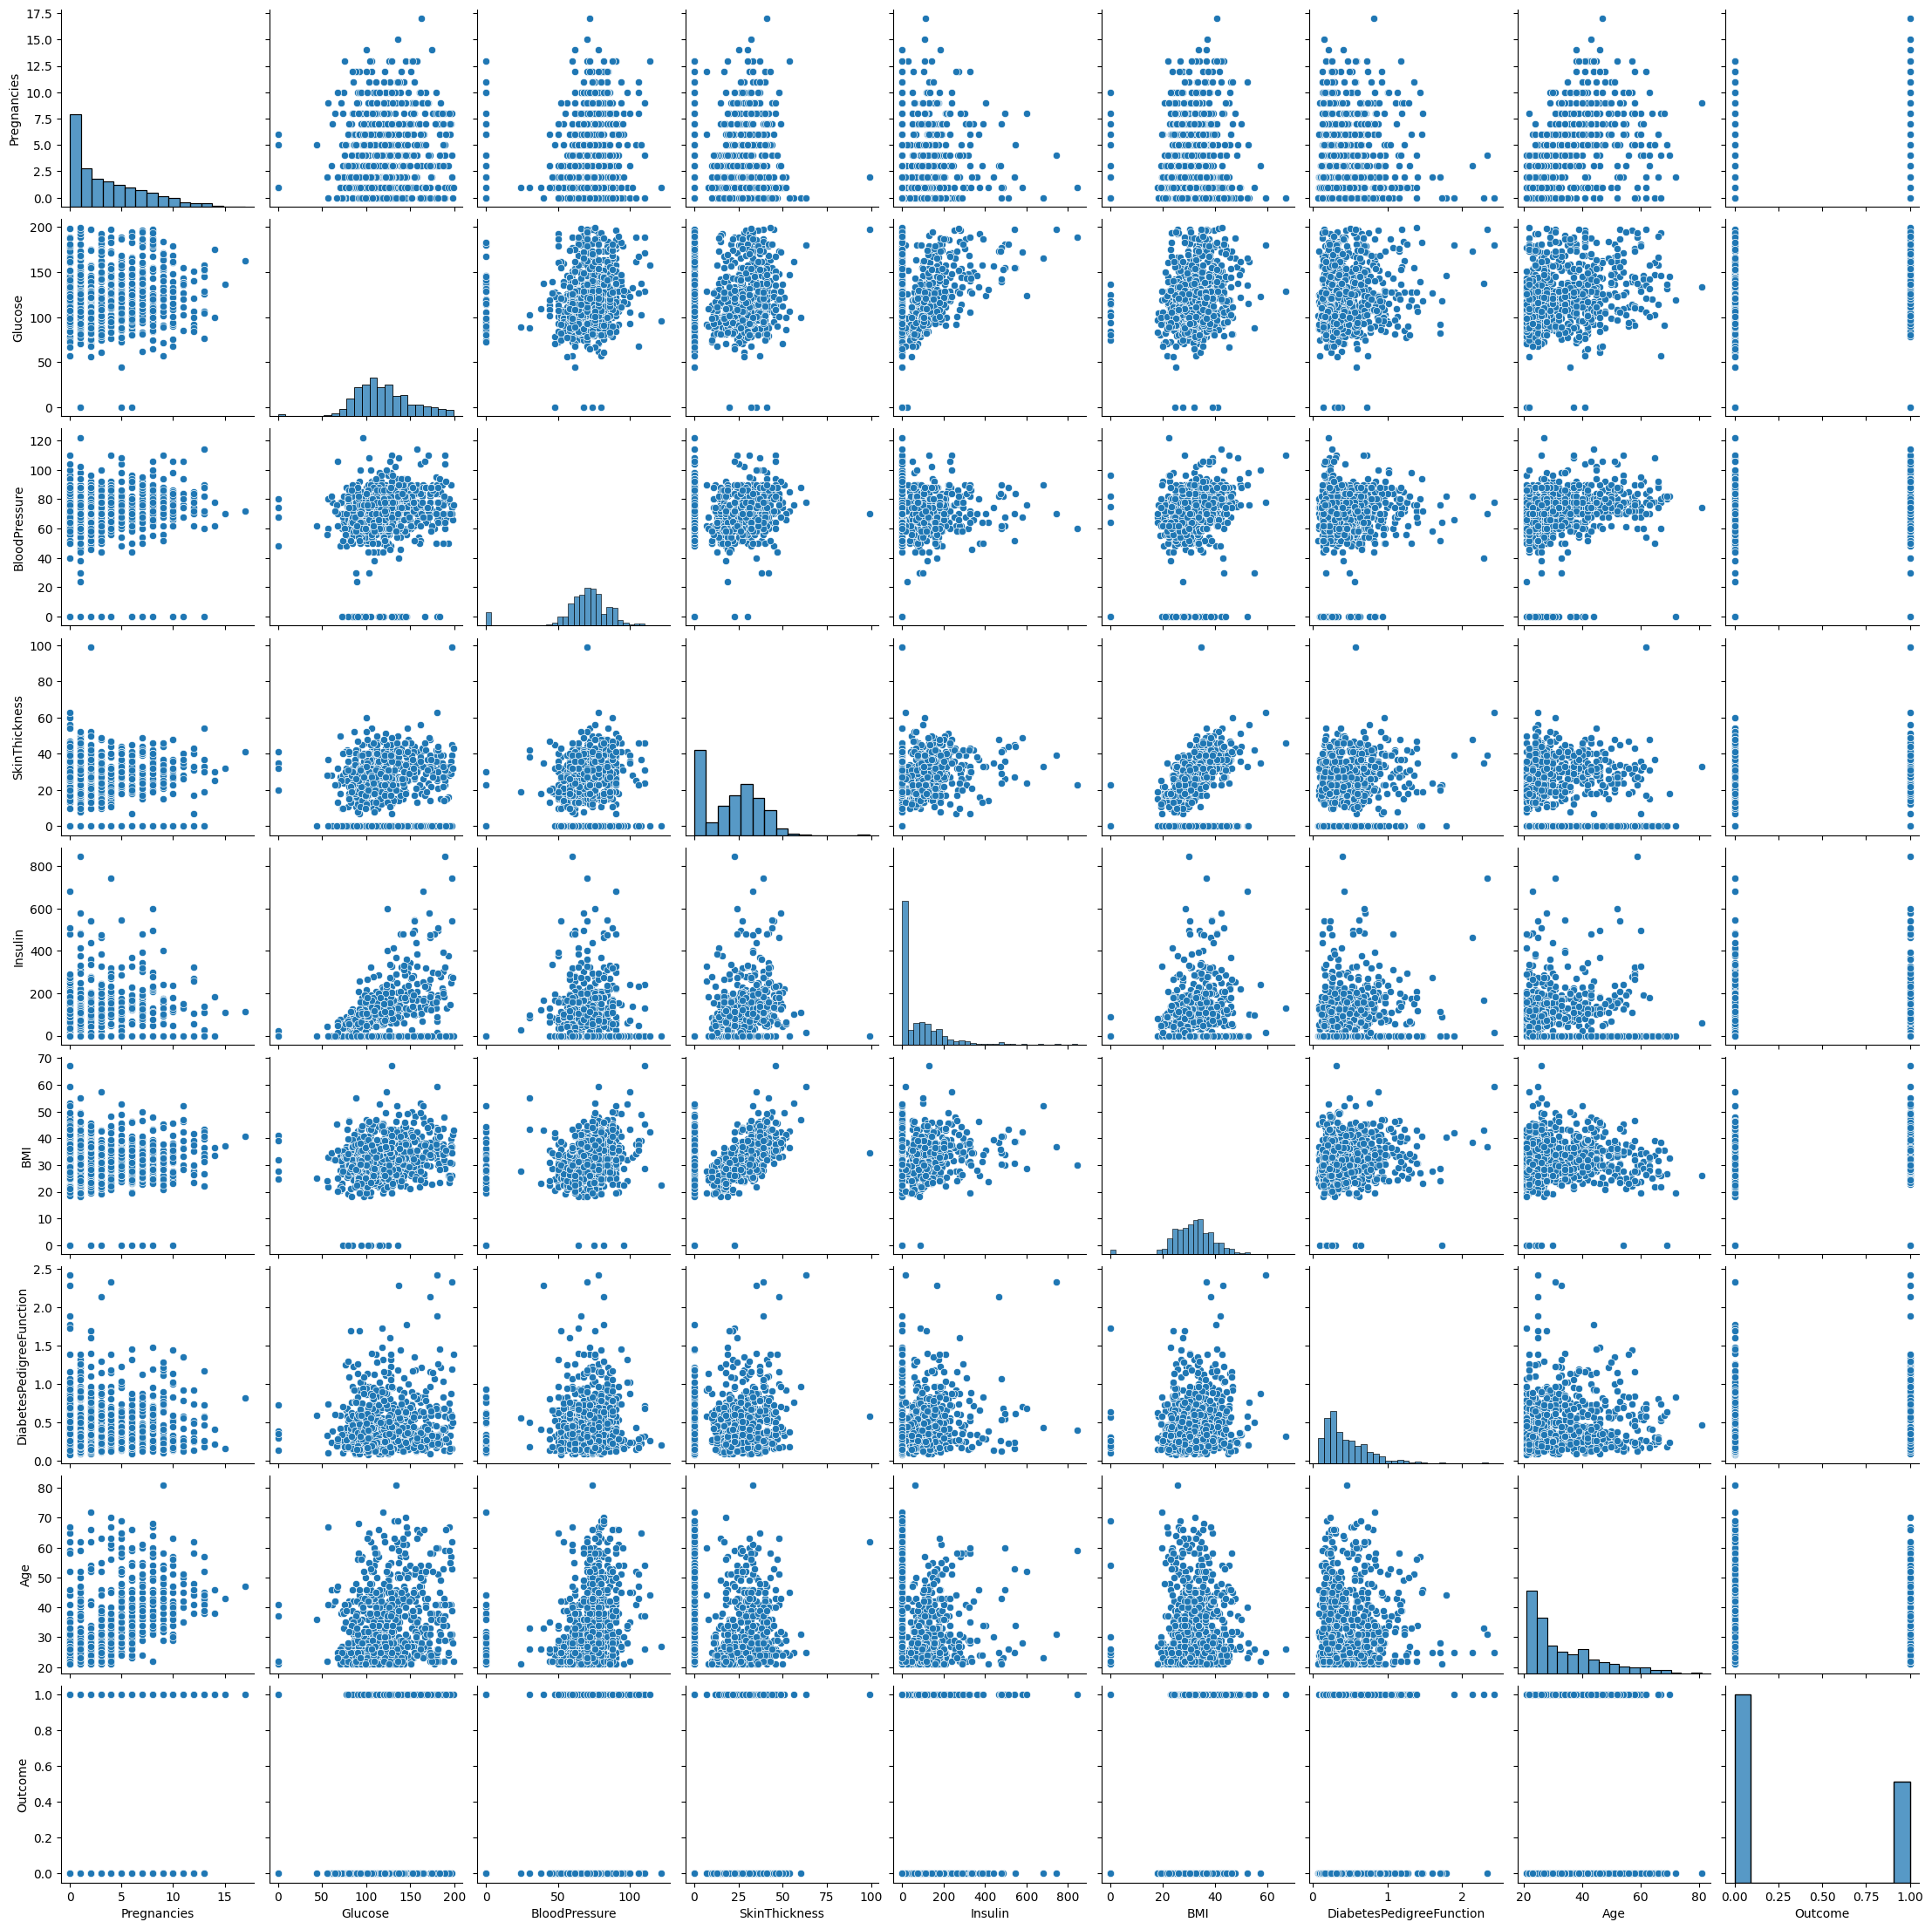

In [5]:
# General pairplot
sns.pairplot(data = total_data)

In [6]:
eda.clean_split(total_data,target)

## STEP 2: FEATURE ENGINEERING

---

### 2.1. Outiler analysis:

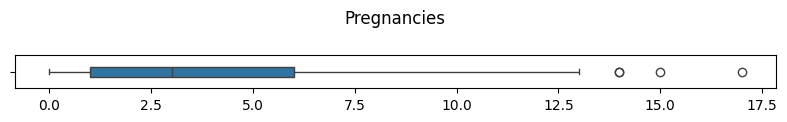

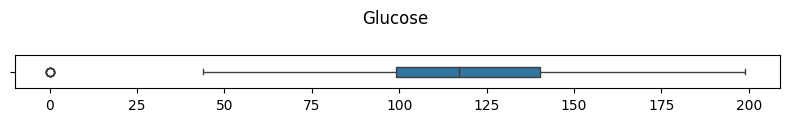

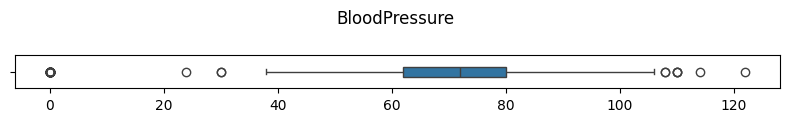

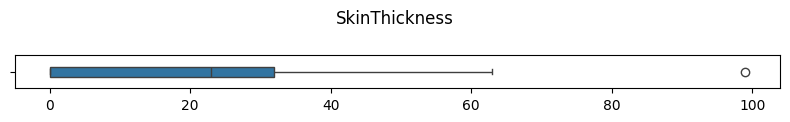

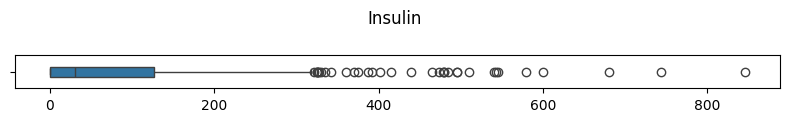

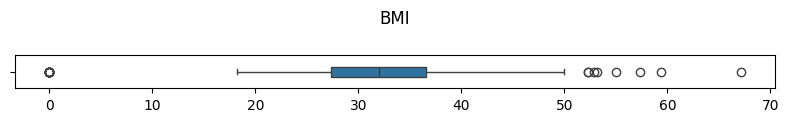

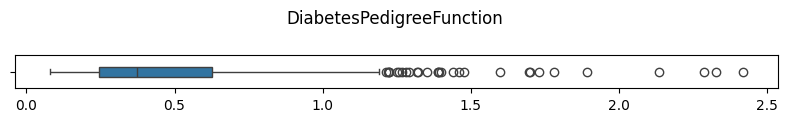

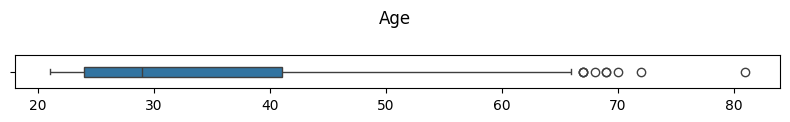

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# CUSTOM FUNCTION for standard outlier analysis (graph and description)
eda.outlier_analysis(total_data,target)

This standard analysis indicates the presence of outliers in all columns. After conducting open-source intelligence (OSINT) research on the variables, it becomes apparent that only records with a value of 0 in certain columns -Glucose, BloodPressure, SkinThickness, Insulin, and BMI— should be considered as genuine outliers, possibly resulting from input errors or other reasons. However, the next step will involve plotting minimum and maximun ocurrences in order obtain more detaills about the distance between max or min vaules. The following plot shows the **occurrences** in the max and min values of the variables:

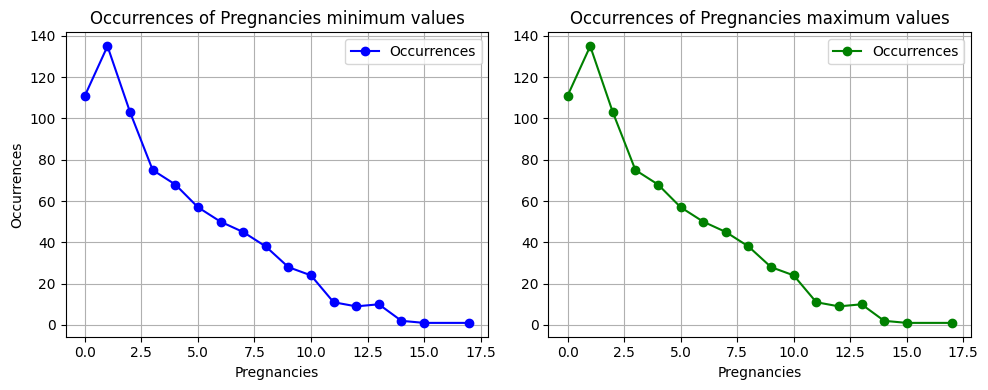

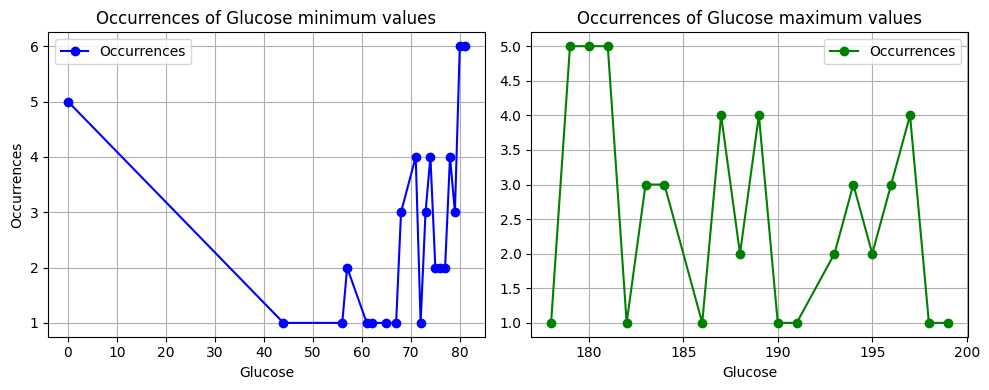

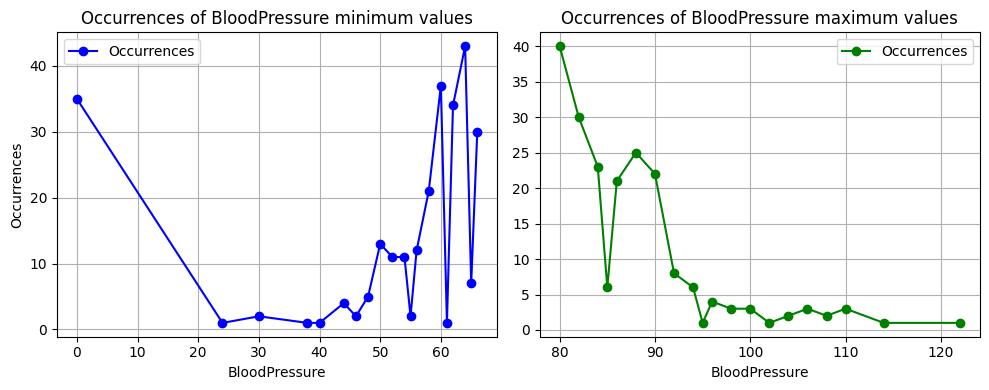

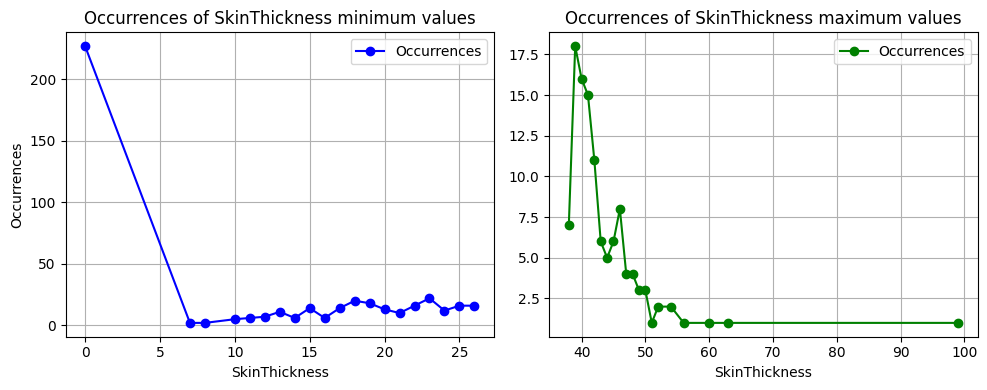

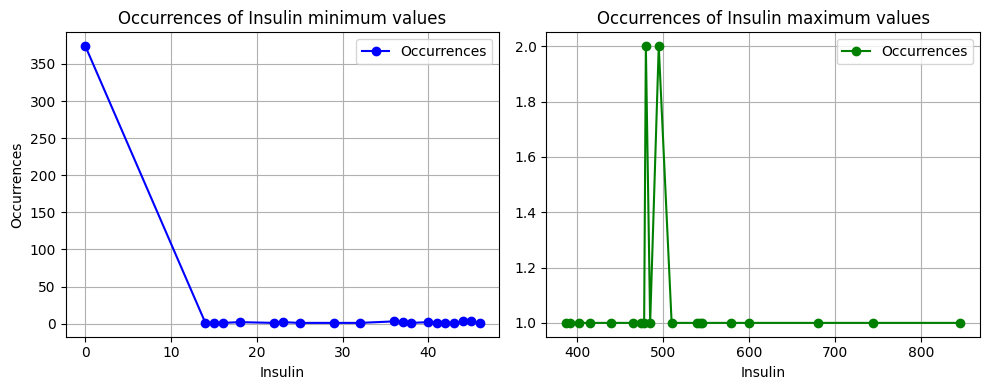

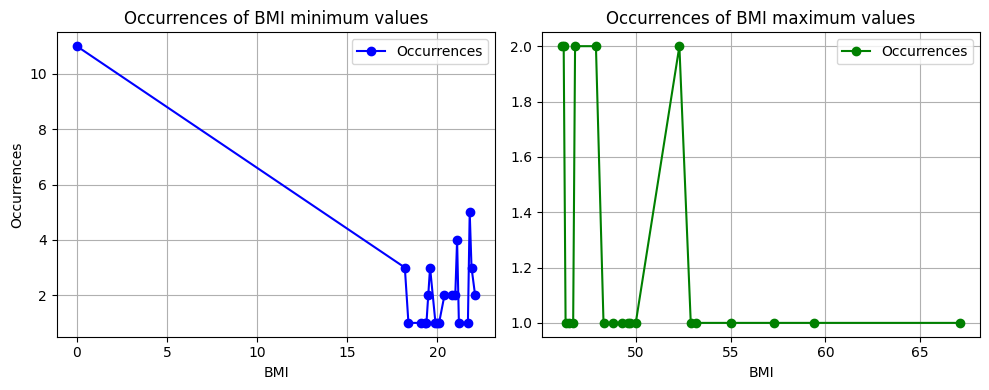

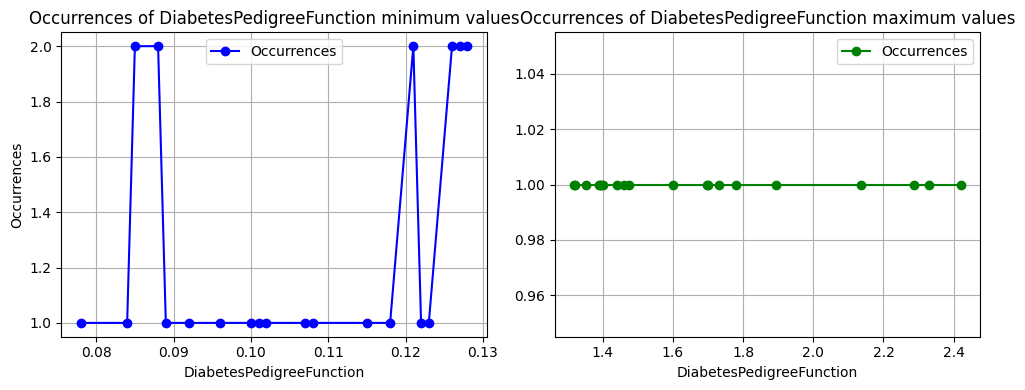

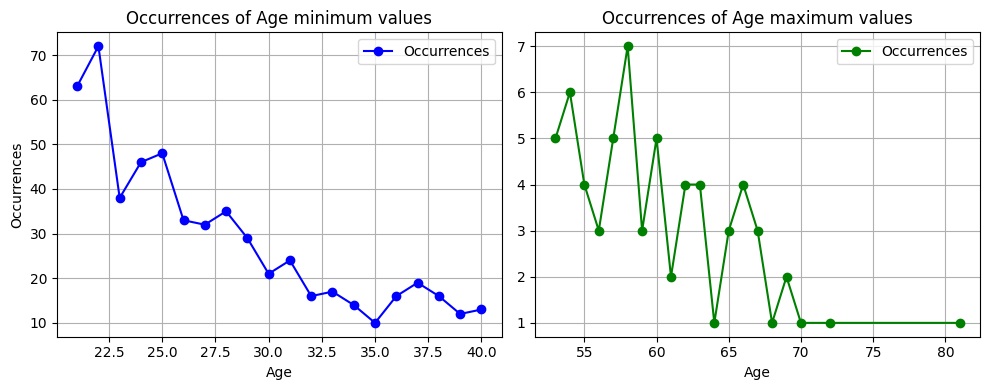

In [8]:
eda.min_max_records(total_data, target, 20)

After the graph analysis, it is possible to determine that the null entry values for Glucose, BloodPressure, SkinThickness, Insulin, BMI  can be considered as **outliers**. The next step is to create an outiler mask to work get information from the null entries.

In [9]:
# CREATING MASK ONLY FOR OUTLIERS
outliers = total_data[
    (total_data['Glucose'] == 0) |
    (total_data['BloodPressure'] == 0) |
    (total_data['SkinThickness'] == 0) |
    (total_data['Insulin'] == 0) |
    (total_data['BMI'] == 0)
]
# CUSTOM FUNCTION FOR OUTLIERS SUMMARY
eda.outliers_summary(total_data,outliers)

the rows with outliers are 376
the total rows are 768
this represents 49.0 % of the dataset


Since they represent the 49% of the dataset, it is not recommended to eliminate or replace them.
Thus, the following analysis will be made without considering the 0 results in the following variables:
Glucose, BloodPressure, SkinThickness, Insulin, and BMI. **The null results will be replaced with NaN values**.


In [10]:
# REPLACING THE 0 VALUES FOR NaN
outliers_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
filtered_total_data = total_data.copy()
filtered_total_data[outliers_columns] = filtered_total_data[outliers_columns].replace(0, np.nan)
print("NaN values per column:")
filtered_total_data.isna().sum()

NaN values per column:


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Now, the analysis will be performed with the filtered dataset. Here there is a comparison between datasets.

In [11]:
print("ORIGINAL DATASET", total_data.shape)
total_data[outliers_columns].describe().T

ORIGINAL DATASET (768, 9)


,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,120.894531,31.972618,0.0,99.0,117.0,140.25,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,62.0,72.0,80.00,122.0
SkinThickness,768.0,20.536458,15.952218,0.0,0.0,23.0,32.00,99.0
Insulin,768.0,79.799479,115.244002,0.0,0.0,30.5,127.25,846.0
BMI,768.0,31.992578,7.884160,0.0,27.3,32.0,36.60,67.1


In [12]:
print("FILTERED DATASET", filtered_total_data.shape)
filtered_total_data[outliers_columns].describe().T

FILTERED DATASET (768, 9)


,count,mean,std,min,25%,50%,75%,max
Glucose,763.0,121.686763,30.535641,44.0,99.00,117.0,141.0,199.0
BloodPressure,733.0,72.405184,12.382158,24.0,64.00,72.0,80.0,122.0
SkinThickness,541.0,29.153420,10.476982,7.0,22.00,29.0,36.0,99.0
Insulin,394.0,155.548223,118.775855,14.0,76.25,125.0,190.0,846.0
BMI,757.0,32.457464,6.924988,18.2,27.50,32.3,36.6,67.1


According to EDA analysis standards, NaN values will be **replaced with the mean of each variable**.

In [13]:
df_mean = filtered_total_data.mean()
clean_total_data = filtered_total_data.copy()
clean_total_data = clean_total_data.fillna(df_mean)

print("DATASET WITH 0 VALUES REPLACED BY MEAN", clean_total_data.shape)
clean_total_data[outliers_columns].describe().T

DATASET WITH 0 VALUES REPLACED BY MEAN (768, 9)


,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,121.686763,30.435949,44.0,99.75,117.000000,140.250000,199.0
BloodPressure,768.0,72.405184,12.096346,24.0,64.00,72.202592,80.000000,122.0
SkinThickness,768.0,29.153420,8.790942,7.0,25.00,29.153420,32.000000,99.0
Insulin,768.0,155.548223,85.021108,14.0,121.50,155.548223,155.548223,846.0
BMI,768.0,32.457464,6.875151,18.2,27.50,32.400000,36.600000,67.1


A comparative summary of the associations between the predictor variables and the target variable at each stage will be presented:

In [14]:
# CUSTOM FUNCTION FOR CORRELATION COMPARISON BETWEEN DATASETS
eda.corr_comparison(total_data,filtered_total_data,clean_total_data,target)

,Original,Filtered,Mean rep.
Pregnancies,0.221898,0.221898,0.221898
Glucose,0.466581,0.494650,0.492928
BloodPressure,0.065068,0.170589,0.166074
SkinThickness,0.074752,0.259491,0.215299
Insulin,0.130548,0.303454,0.214411
BMI,0.292695,0.313680,0.311924
DiabetesPedigreeFunction,0.173844,0.173844,0.173844
Age,0.238356,0.238356,0.238356


1. **Correlation Improvements:**
   - The "Glucose" and "Blood Pressure" variables showed enhanced correlation after filtering and mean replacement, suggesting that these processes may have strengthened their relationship with the target variable.

2. **Variable Results:**
   - For "Skin Thickness" and "Insulin," initial filtering improved correlation, but additional mean replacement reduced correlation. This implies that the initial filtering was beneficial, but subsequent mean replacement may have eliminated relevant information.

3. **Correlation Stability:**
   - "Diabetes Pedigree Function" and "Age" exhibited nearly constant correlations across all conditions, indicating that the applied transformations had little impact on their relationship with the target variable.


The histograms displaying the values distribution after mean replacement. It is possible to see that the distribution of the variables have become lightly more normal. The histogram shows a large increase of values in Variables 'SkinThickness' and 'Insulin' due to the replacent done.

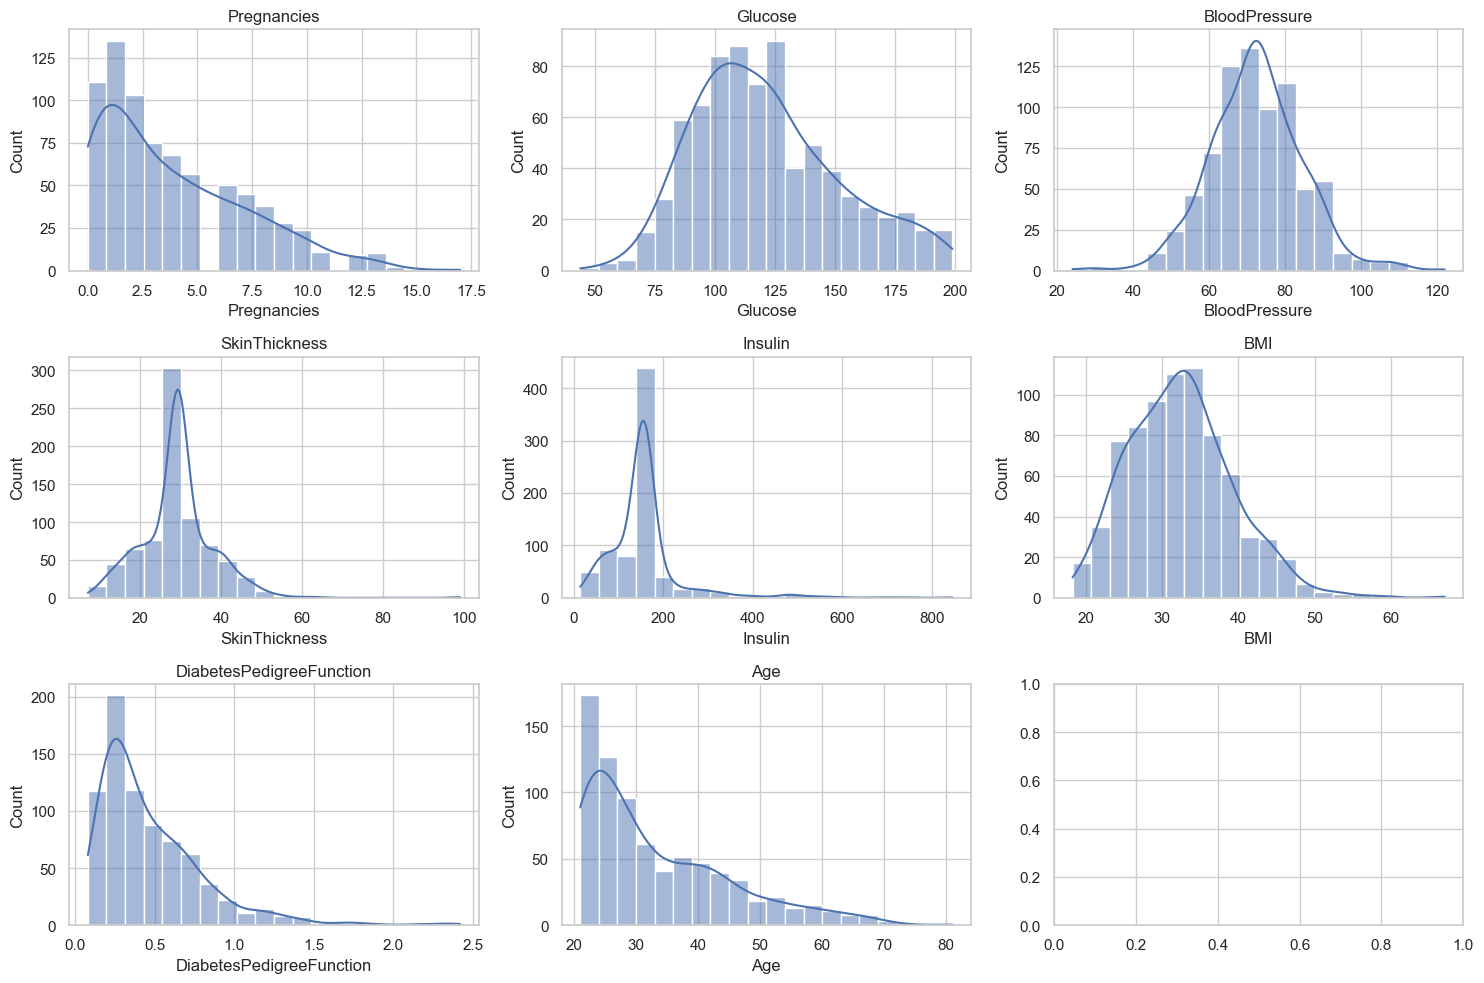

In [15]:
# CUSTOM FUNCTION FOR HISTOGRAMS
eda.small_histogram(clean_total_data,target)

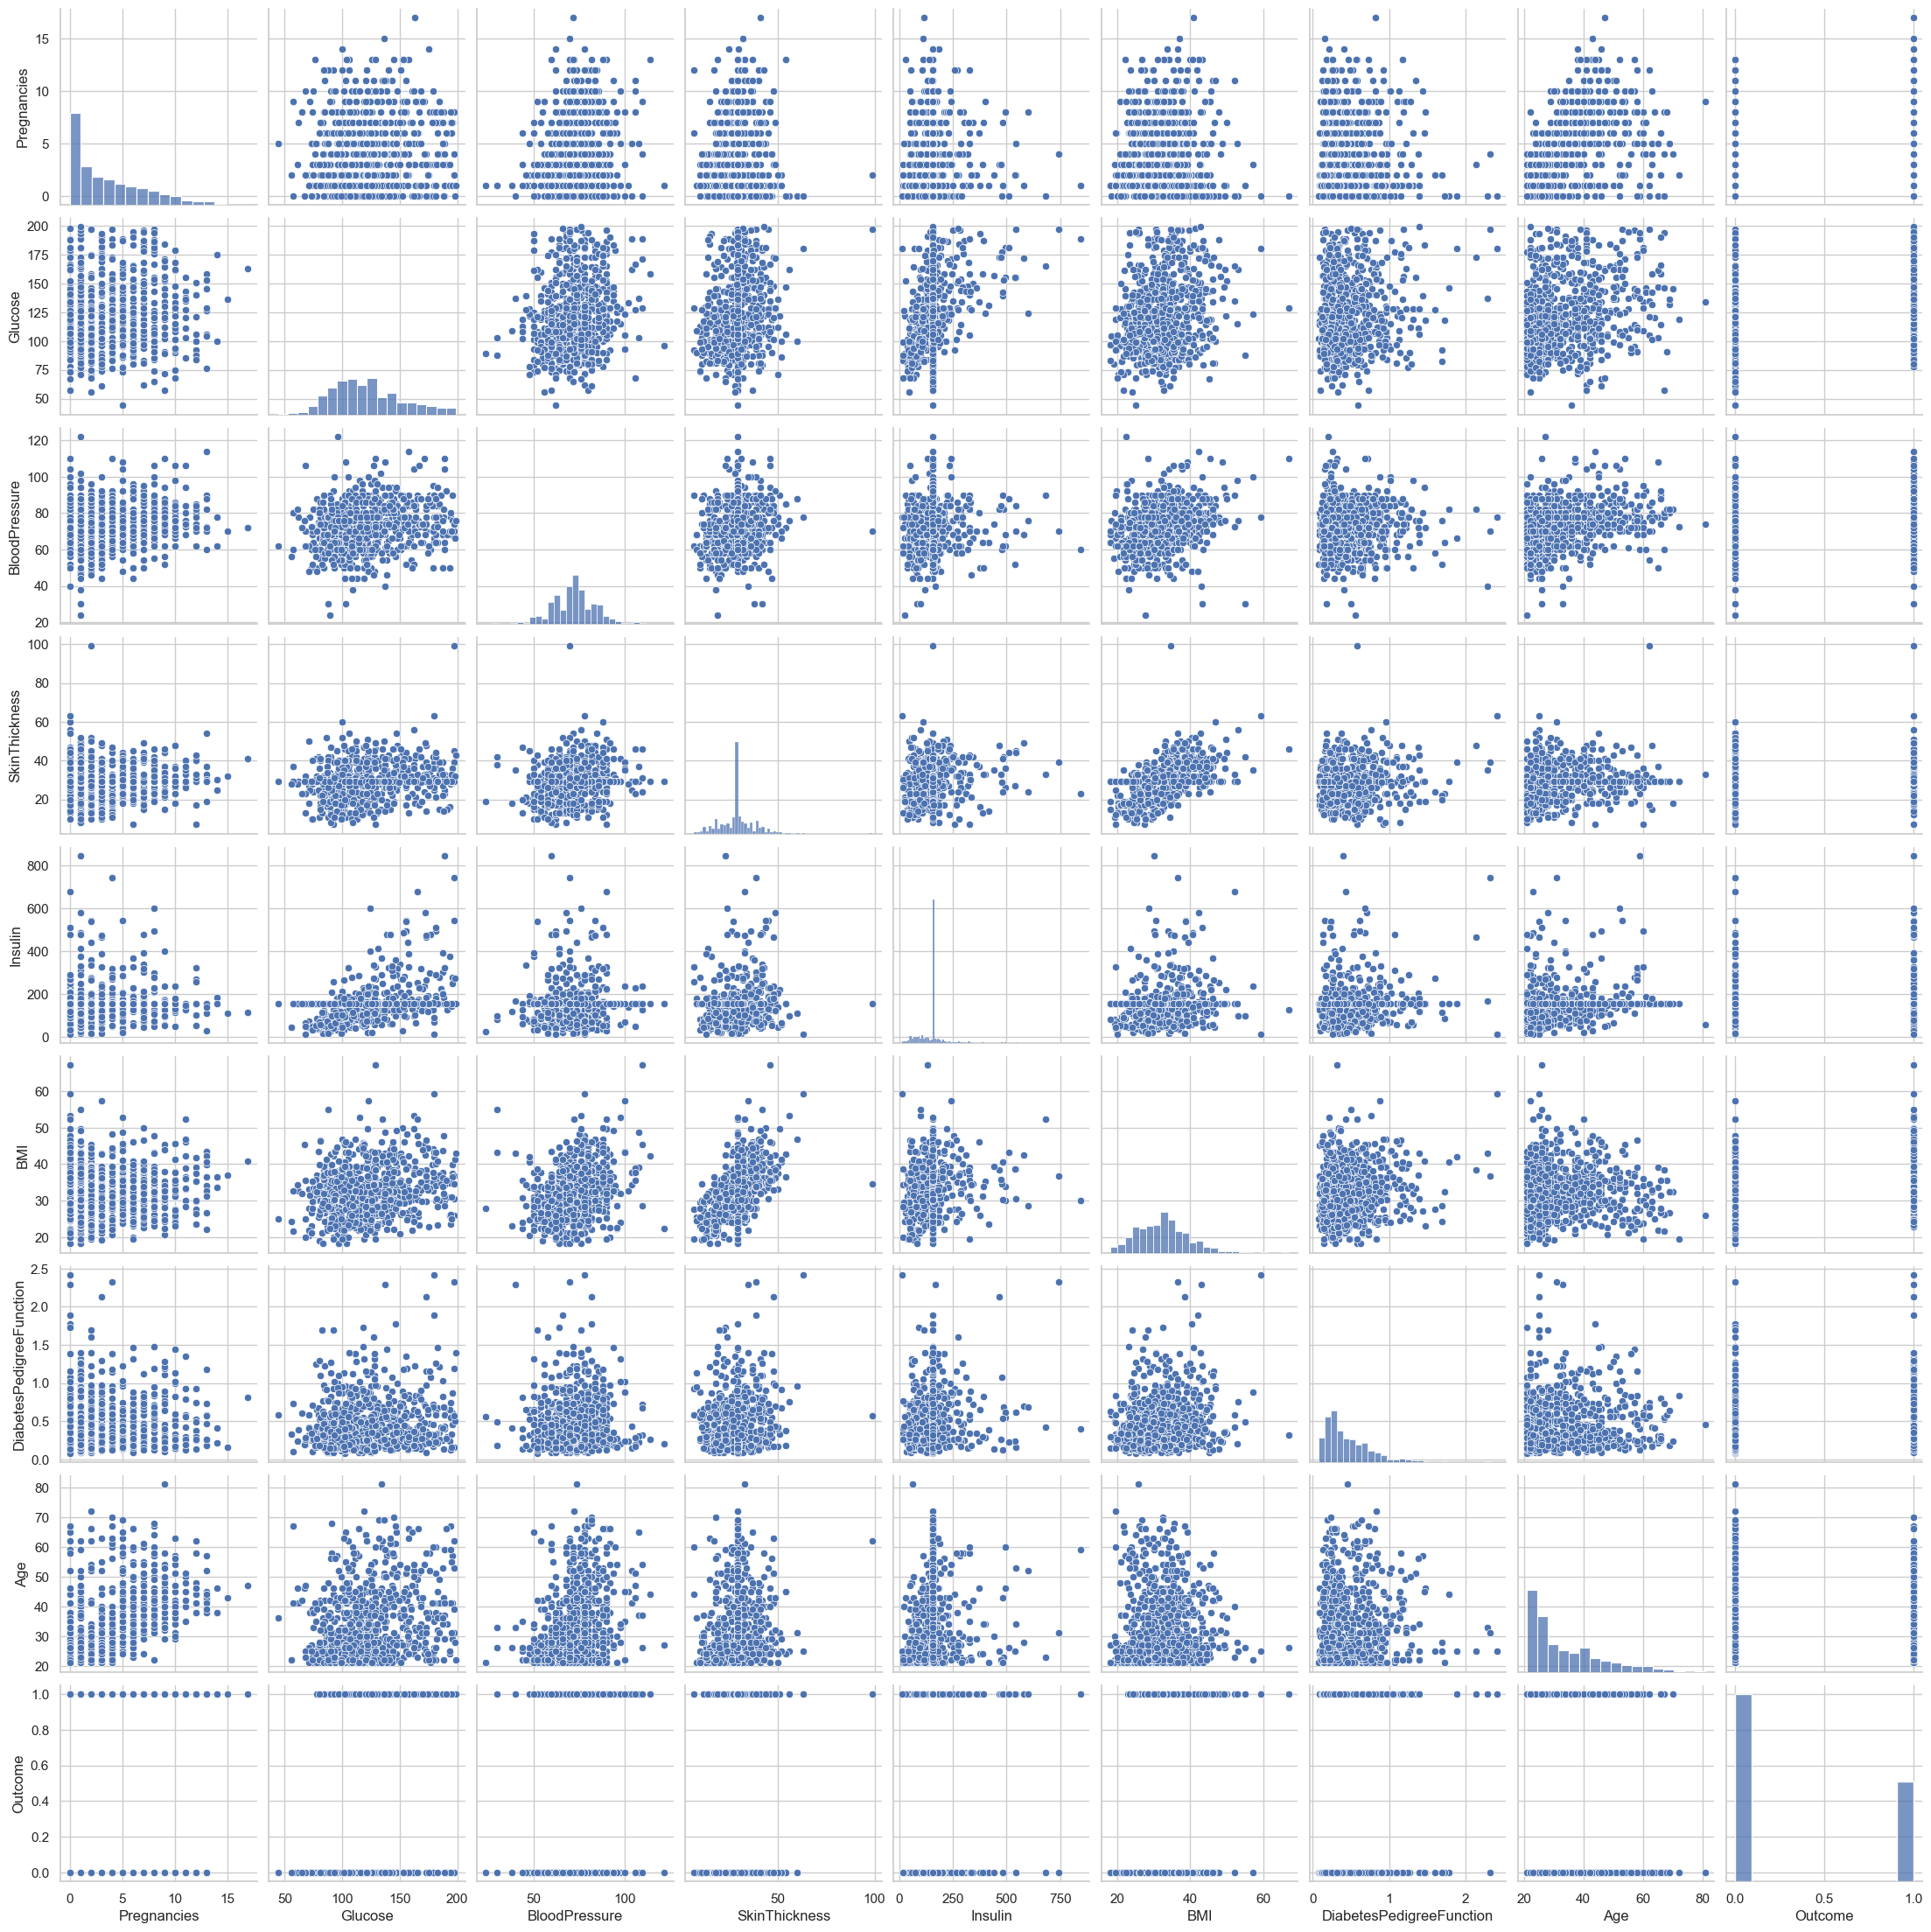

In [16]:
sns.pairplot(data = clean_total_data)

### Step 3: Feature selection
_NOTE: After the analysis it is determined that there are no viable options for merging variables or generating new features._



### 3.1. Train / Test division

_NOTE: The Train / Test division will use the seed no. 42._

In [17]:
from sklearn.model_selection import train_test_split
variables = [x for x in total_data.columns if x != target]
# We divide the dataset into training and test samples
X = clean_total_data.drop(target, axis = 1)[variables]
y = clean_total_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,72.405184,29.15342,155.548223,32.457464,0.304,21
618,9,112.0,82.000000,24.00000,155.548223,28.200000,1.282,50
346,1,139.0,46.000000,19.00000,83.000000,28.700000,0.654,22
294,0,161.0,50.000000,29.15342,155.548223,21.900000,0.254,65
231,6,134.0,80.000000,37.00000,370.000000,46.200000,0.238,46


### 3.2. Saving the dataset (before feature selection)

In [18]:
X_train[target] = list(y_train)
X_test[target] = list(y_test)
X_train.to_csv("clean_dataset_train.csv", index=False)
X_test.to_csv("clean_dataset_test.csv", index=False)

### 3.3. Selection of features

In [19]:
from sklearn.feature_selection import f_classif, SelectKBest
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])
X_train_sel.head()

c:\Users\Francesc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,Glucose,SkinThickness,BMI,Age,Outcome
0,84.0,29.15342,32.457464,21.0,0.0
1,112.0,24.00000,28.200000,50.0,1.0
2,139.0,19.00000,28.700000,22.0,0.0
3,161.0,29.15342,21.900000,65.0,0.0
4,134.0,37.00000,46.200000,46.0,1.0


### 3.3. Saving the modified dataset

In [20]:
X_train_sel[target] = list(y_train)
X_test_sel[target] = list(y_test)
X_train_sel.to_csv("sel_dataset_train.csv", index=False)
X_test_sel.to_csv("sel_dataset_test.csv", index=False)

---
## GENERAL CONCLUSIONS OF EDA ANALYSIS

With this step, the Exploratory Data Analysis (EDA) is considered complete. Below are concise bullet points summarizing the main conclusions:

**1. General Dataset Conclusions:**

**_Dataset Overview:_**
- The dataset encompasses 768 entries and 9 columns, including 8 feature columns and a target variable labeled 'Outcome.'

**_Data Characteristics:_**
- All predictive variables are numeric. The 'Outcome' variable is numerical categorical, with '0' denoting a negative outcome and '1' indicating a positive outcome.

**_Data Quality:_**
- The dataset is complete with no missing values. No duplicate entries are present, and the distribution of most variables aligns with normality. However, the existence of '0' values and statistically high values suggests potential outliers, which has been confirmed as an entry mistake.

**2. Summary of Correlations Between Predictor Variables and the Target Variable (Outcome):**

|  Variable           | Original  | Filtered  | Mean rep. | Evolution |
|---------------------|-----------|-----------|-----------|-----------|
| Pregnancies         | 0.22      | 0.22      | 0.22      | Similar   |
| Glucose             | 0.47      | 0.49      | 0.49      | Positive  |
| BloodPressure       | 0.07      | 0.17      | 0.17      | Positive  |
| SkinThickness       | 0.07      | 0.26      | 0.22      | Positive* |
| Insulin             | 0.13      | 0.30      | 0.21      | Positive* |
| BMI                 | 0.29      | 0.31      | 0.31      | Positive  |
| DiabetesPF          | 0.17      | 0.17      | 0.17      | Similar   |
| Age                 | 0.24      | 0.24      | 0.24      | Similar   |

_<small>Note: * means that despite the overall positive outcome, the change between filtered and mean-replaced affected the correlation negatively.</small>_

**3. Outliers and Variable Analysis:**

- Values with 0 in mentioned columns deemed as outliers, representing 49% of the dataset.

- The analysis, considering 0 values as null in variables (Glucose, Blood Pressure, Skin Thickness, Insulin, BMI), reveals increased correlation and a slightly more normal distribution.

- The change between filtered and mean-replaced data showed mixed outcomes. While "Glucose" and "Blood Pressure" exhibited enhanced correlations after the mean replacement, "Skin Thickness" and "Insulin" initially improved with filtering but saw a reduction in correlation after mean replacement.

**4. Feature selection:**

- There are no viable options for merging variables or generating new features.

- The selection of best features provided the following result: 'Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age'

**5. saved files:**

The following files were saved during the EDA analysis:

- early_x - the dataset without any change.

- clean_dataset - the dataset with outliers replacement

- sel_dataset - the dataset with outliers replacement and feature selection